In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

# k_indices = build_k_indices(np.array([1, 2, 3, 4, 5, 6]), 2, 10)
# k_indices

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    train_indices = k_indices[np.arange(len(k_indices))!=k]
    train_indices = train_indices.reshape([1, -1])[0]
    test_indices = k_indices[k]
    y_train = y[train_indices]
    x_train = x[train_indices]
    y_test = y[test_indices]
    x_test = x[test_indices]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_train_poly = build_poly(x_train, degree)
    x_test_poly = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    mse, weights = ridge_regression(y_train, x_train_poly, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = np.sqrt(2*mse)
    loss_te = np.sqrt(2*compute_mse(y_test, x_test_poly, weights))
    
    return loss_tr, loss_te

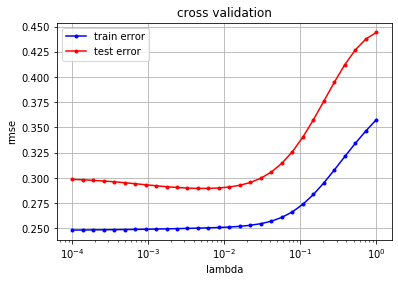

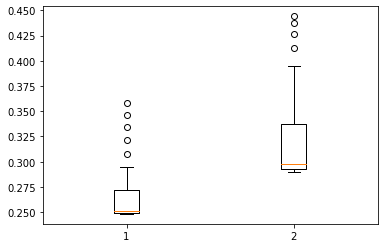

In [8]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        loss_tr = np.zeros(k_fold)
        loss_te = np.zeros(k_fold)
        for i,k in enumerate(range(k_fold)):
            loss_tr[i], loss_te[i] = cross_validation(y, x, k_indices, k, lambda_, degree)
        rmse_tr.append(np.mean(loss_tr))
        rmse_te.append(np.mean(loss_te))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
    # Variance af RMSE
    fig, ax = plt.subplots()
    ax.boxplot([rmse_tr, rmse_te])

cross_validation_demo()

### Model selection between various polynomial degrees

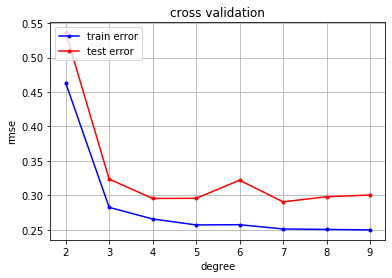

In [9]:
from plots import cross_validation_visualization

def cross_validation_polynomial_degree():
    seed = 1
    degrees = np.arange(2, 10)
    k_fold = 4
    lambda_ = 1e-2  # 1e-2 usually minimizes test error in cross_validation_demo
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for degree in degrees:
        loss_tr = np.zeros(k_fold)
        loss_te = np.zeros(k_fold)
        for i,k in enumerate(range(k_fold)):
            loss_tr[i], loss_te[i] = cross_validation(y, x, k_indices, k, lambda_, degree)
        rmse_tr.append(np.mean(loss_tr))
        rmse_te.append(np.mean(loss_te))
        
    plt.plot(degrees, rmse_tr, marker=".", color='b', label='train error')
    plt.plot(degrees, rmse_te, marker=".", color='r', label='test error')
    plt.xlabel("degree")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)

cross_validation_polynomial_degree()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

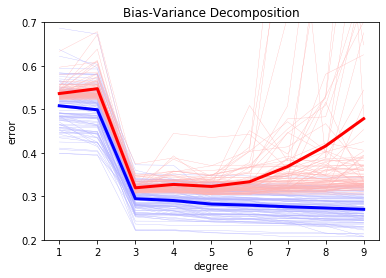

In [15]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            x_train_poly = build_poly(x_train, degree)
            x_test_poly = build_poly(x_test, degree)
            mse, weights = least_squares(y_train, x_train_poly)
            rmse_tr[index_seed, index_degree] = np.sqrt(2*mse)
            rmse_te[index_seed, index_degree] = np.sqrt(2*compute_mse(y_test, x_test_poly, weights))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()